In [1]:
##This skript compare all data in names one with each other

In [2]:
from array import ArrayType, array
from cProfile import label
from ctypes import Array
from email import header
from ntpath import join
from os import sep
from statistics import mean, median
from tkinter.ttk import Separator
from xml.etree.ElementPath import xpath_tokenizer
from scipy.io import loadmat
import pandas
import matplotlib.pyplot as plt
from matplotlib.widgets import SpanSelector
import numpy as np
import seaborn as sns
from scipy.signal import find_peaks
from scipy.stats import shapiro
import pingouin as pg
import math

#point with nice signal
num=25

In [3]:
#name of records, which we would like to calculate-healthy
names=['ZM001_b_data','ZM002_b_data','ZM004_b_data','ZM005_b_data','ZF006_b_data','ZF007_b_data','ZM008_b_data','ZM009_b_data','ZF010_b_data','ZF011_b_data']

#name of records, which we would like to calculate-paralyzed left
#names=['SM002_bal_data','SM003_bal_data','SM004_bal_data','SM005_bal_data','SM008_bal_data','SM009_bal_data']

#name of records, which we would like to calculate-paralyzed left
#names=['SF006_bar_data','SF007_bar_data','SF010_bar_data','SF011_bar_data']

#name of records for selecting point
#names=['ZM001_b_data','SM003_bal_data']

In [4]:
#function which select peaks in signal and set borders for next calculation
def select2(x,rel_hig, wid,dis,a,b,promin=0):
    if promin==0:
        promin=(max(x[a:b])-mean(x[a:b]))*0.5
    peaks, properties = find_peaks(-x[a:b], prominence=promin, rel_height=rel_hig, width=wid, distance=dis)
    if len(peaks)>6:
        promin=promin+0.002/20
        peaks,properties=select2(x, rel_hig, wid,dis,a,b,promin)
    properties["prominences"], properties["widths"]
    return peaks, properties

In [5]:
#function for testing equality of means
def process(data1, data2):

    #get signal with exercise only
    peak1,prop1=select2(data1[num],0.8,1,5.5,0,len(data1))
    peak2,prop2=select2(data2[num],0.8,1,5.5,0,len(data2))

    #widen peaks area
    p=2

    #make for each pair of point
    p_values=np.array([])
    for i in range(0,len(data1.columns)-1):
        x=np.array([])
        y=np.array([])

        #make signal with all peaks
        for j in range(0,min(len(peak2),len(peak1))):
            xpo=datah[i][round(prop1['left_ips'][j])-p:round(prop1['right_ips'][j])+p]
            ypo=datap[i][round(prop2['left_ips'][j])-p:round(prop2['right_ips'][j])+p]
            x=np.append(x,xpo)
            y=np.append(y,ypo)

        #mann-whitny U test
        stat=pg.mwu(x,y,alternative='two-sided')
        p_val=stat['p-val'][0]
        p_values=np.append(p_values,p_val)
    return p_values

In [6]:
#function for mormalizing distances
def normalize(data):
    for l in range(12,len(data.columns)-1):
        data[l]= data[l]-mean(data[l])/data[l].std()
    return(data)

In [7]:
#testing one record against another
p_val=pandas.DataFrame([])

for k in range(0,len(names)-1):
    for i in range(k+1,len(names)):

        datah=pandas.read_csv(join(r'C:\Users\kuba8\MATLAB Drive\projekt oblicej\dataPython',names[k]+'.txt'),sep=' ',header=None)
        datah=datah.transpose()
        datah=normalize(datah)

        datap=pandas.read_csv(join(r'C:\Users\kuba8\MATLAB Drive\projekt oblicej\dataPython',names[i]+'.txt'),sep=' ',header=None)
        datap=datap.transpose()
        datap=normalize(datap)
        
        p_val[names[k]+'/'+names[i]]=process(datah,datap)

In [13]:
#p_val
datah

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,88.022684,85.748476,86.313291,87.678187,87.928354,85.919660,87.864375,88.898153,89.625904,87.689461,...,-38.968030,-39.156980,-44.623186,-44.781440,-34.208067,-34.443134,-36.488042,-36.705041,-204.688088,41.890523
1,89.575869,87.834351,88.314229,89.036176,87.488784,86.915785,89.589347,88.435692,87.648446,89.549260,...,-38.969564,-39.158584,-44.624530,-44.782850,-34.209475,-34.444608,-36.489593,-36.706662,-204.688381,42.153992
2,88.618216,88.750669,88.593542,88.461012,86.721750,87.053020,88.570793,87.411790,86.602856,88.628623,...,-38.969330,-39.158358,-44.624441,-44.782767,-34.209336,-34.444477,-36.489344,-36.706422,-204.688277,42.356026
3,89.623476,87.406386,87.821807,88.976327,87.787825,86.916647,89.595232,88.896984,88.250161,89.433398,...,-38.968560,-39.157561,-44.623729,-44.782030,-34.208604,-34.443719,-36.488569,-36.705619,-204.688531,42.622500
4,88.820205,88.838465,88.295636,88.429086,86.950368,87.289142,88.782058,87.623571,86.761956,88.888088,...,-38.968461,-39.157410,-44.623620,-44.781872,-34.208501,-34.443566,-36.488480,-36.705478,-204.688087,42.824832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,86.179307,84.193211,85.610099,86.513942,86.139748,84.139810,86.143680,86.912493,88.057597,86.053295,...,-38.970659,-39.159643,-44.625725,-44.784011,-34.210654,-34.445755,-36.490744,-36.707779,-204.688779,77.818789
168,87.183600,85.296514,86.774464,87.634417,86.907728,85.135265,87.216578,87.840209,89.014464,87.150701,...,-38.970813,-39.159812,-44.625945,-44.784243,-34.210818,-34.445932,-36.490863,-36.707912,-204.688708,77.949378
169,86.597541,84.644987,85.678163,86.638450,86.883772,84.809377,86.464080,87.382548,88.282096,86.416231,...,-38.971132,-39.160082,-44.626129,-44.784381,-34.211027,-34.446093,-36.491193,-36.708192,-204.688408,78.021560
170,86.006110,84.061718,85.126934,86.095257,86.305558,84.246197,85.867491,86.783681,87.731999,85.828747,...,-38.970991,-39.159960,-44.626028,-44.784298,-34.210946,-34.446031,-36.491061,-36.708080,-204.688562,78.225001


In [9]:
#find points with has big p_value big enought
req_points=pandas.DataFrame([])

#sort p_values
for i in range(0,len(p_val)):
    if p_val[p_val<0.05].count(axis=1)[i]<50:
        req_points['point_'+str(i)]=[sum(p_val.iloc[i])]

#print sorted p_values
print(req_points.sort_values(by=0, axis=1,ascending=False))


    point_7  point_11   point_0   point_9   point_6   point_3   point_2  \
0  5.821348  5.798667  5.603226  5.510723  5.001747  4.436882  3.988822   

    point_1  point_10   point_4  ...      point_21      point_19  \
0  3.692276  3.667885  3.029908  ...  2.352576e-23  2.352576e-23   

       point_18      point_17      point_16      point_15      point_14  \
0  2.352576e-23  2.352576e-23  2.352576e-23  2.352576e-23  2.352576e-23   

       point_13      point_12      point_40  
0  2.352576e-23  2.352576e-23  2.352576e-23  

[1 rows x 41 columns]


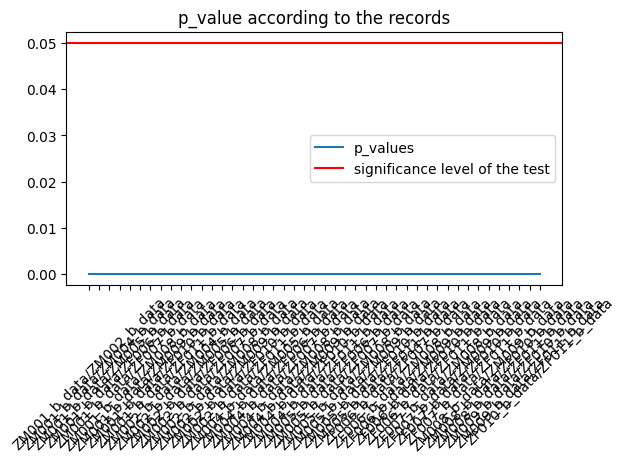

In [10]:
#plot p-value for one point for each pair of records
plt.plot(p_val.iloc[37],label='p_values')
plt.axhline(y=0.05, color='r', linestyle='-',label='significance level of the test')
plt.title('p_value according to the records')
plt.xticks(rotation=45)
plt.subplots_adjust(bottom=0.352)
plt.legend()
plt.show()

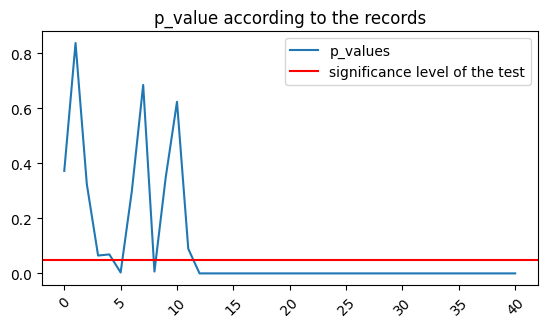

In [11]:
#plot p-values for each pair of value
plt.plot(p_val['ZM001_b_data/ZM002_b_data'],label='p_values')
plt.axhline(y=0.05, color='r', linestyle='-',label='significance level of the test')
plt.title('p_value according to the records')
plt.xticks(rotation=45)
plt.subplots_adjust(bottom=0.352)
plt.legend()
plt.show()

In [12]:
'''
num=1
#plot measured line
######################################################################
f,ax = plt.subplots()
plt.plot(datah[40]-datah[40][0],datah[num], color='green', linestyle='dashed', linewidth = 1, marker='o', markerfacecolor='green', markersize=1,label='healthy1')
plt.plot(datap[40]-datap[40][0],datap[num], color='blue', linestyle='dashed', linewidth = 1, marker='o', markerfacecolor='blue', markersize=1,label='healthy2')
ax.set_title('Signal of exercise')
ax.set_xlabel('time [s]')
ax.legend()
if num<12:
    ax.set_ylabel('angle [degrees]')
else:
    ax.set_ylabel('distance')
plt.show()
#######################################################################


#boxplot
f,ax = plt.subplots()
ax.set_title('Difference between healthy and paralyzed pacient')
if num<12:
    ax.set_ylabel('angle [degrees]')
else:
    ax.set_ylabel('distance')
sns.boxplot([yh,yp])
ax.set(xticklabels=['healthy','paralyzed'])
plt.show()


#plot measured line only peaks
f,ax = plt.subplots()
plt.plot(xh, yh, color='green', linestyle='dashed', linewidth = 1, marker='o', markerfacecolor='green', markersize=1,label='healthy')
#plt.plot(xp, yp, color='blue', linestyle='dashed', linewidth = 1, marker='o', markerfacecolor='blue', markersize=1,label='paralyzed')

ax.set_title('Signal of exercise only peaks')
ax.set_xlabel('time [s]')
ax.legend()

if num<12:
    ax.set_ylabel('angle [degrees]')
else:
    ax.set_ylabel('distance')
plt.show()

####################################################################
#boxplot
f,ax = plt.subplots()
ax.set_title('Difference between healthy and paralyzed pacient')
if num<12:
    ax.set_ylabel('angle [degrees]')
else:
    ax.set_ylabel('distance')
sns.boxplot([yh,yp])
ax.set(xticklabels=['healthy','paralyzed'])
plt.show()

####################################################################
#violinplot
f,ax = plt.subplots()
ax.set_title('Difference between healthy and paralyzed pacient')
if num<12:
    ax.set_ylabel('angle [degrees]')
else:
    ax.set_ylabel('distance')
#sns.boxplot([yh,yp])
sns.violinplot([yh,yp])
ax.set_xticks([0,1])
ax.set(xticklabels=['healthy','paralyzed'])
#plt.scatter(np.ones(len(datah[0])),datah[num])
#plt.scatter(np.ones(len(datap[0]))+1,datap[num])
plt.show()

'''
######################################################################
#test of normality
#st1=shapiro(yh)
#st2=shapiro(yp)

"\nnum=1\n#plot measured line\n######################################################################\nf,ax = plt.subplots()\nplt.plot(datah[40]-datah[40][0],datah[num], color='green', linestyle='dashed', linewidth = 1, marker='o', markerfacecolor='green', markersize=1,label='healthy1')\nplt.plot(datap[40]-datap[40][0],datap[num], color='blue', linestyle='dashed', linewidth = 1, marker='o', markerfacecolor='blue', markersize=1,label='healthy2')\nax.set_title('Signal of exercise')\nax.set_xlabel('time [s]')\nax.legend()\nif num<12:\n    ax.set_ylabel('angle [degrees]')\nelse:\n    ax.set_ylabel('distance')\nplt.show()\n#######################################################################\n\n\n#boxplot\nf,ax = plt.subplots()\nax.set_title('Difference between healthy and paralyzed pacient')\nif num<12:\n    ax.set_ylabel('angle [degrees]')\nelse:\n    ax.set_ylabel('distance')\nsns.boxplot([yh,yp])\nax.set(xticklabels=['healthy','paralyzed'])\nplt.show()\n\n\n#plot measured line only pe